Importing the necessary packages

In [21]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Blen\OneDrive\Desktop\10Academy\Week0\data\benin-malanville.csv')

Calculating mean,mode, and SD

In [22]:
summary_stats = df.describe()
print(summary_stats)


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

Checking for missing values and outliers

In [23]:
missing_values = df.isnull().sum()
outliers = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
print(missing_values)
print(outliers)


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...

Handling missing values and anomalies

In [24]:
df.drop('Comments', axis=1, inplace=True)
df['GHI'] = df['GHI'].clip(lower=0)
df['DNI'] = df['DNI'].clip(lower=0)
df['DHI'] = df['DHI'].clip(lower=0)

Check for outliers in sensor readings (ModA, ModB) and wind speed data (WS, WSgust) using z-score.
And removing the rows with outliers on them

In [25]:
import numpy as np
from scipy import stats

In [30]:

z_scores = np.abs(stats.zscore(df[['ModA', 'ModB', 'WS', 'WSgust']]))


outliers = (z_scores > 3).any(axis=1)

df = df[~outliers]


Timestamp Analysis

In [31]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


Checking the data after cleaning

In [32]:
missing_values = df.isnull().sum()
outliers = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
print(missing_values)
print(outliers)

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []


Calculating the total number of rows after cleaning the data

In [33]:
total_rows = df.shape[0]
print("Total number of rows:", total_rows)


Total number of rows: 521598


Heatmap for correlation matrix

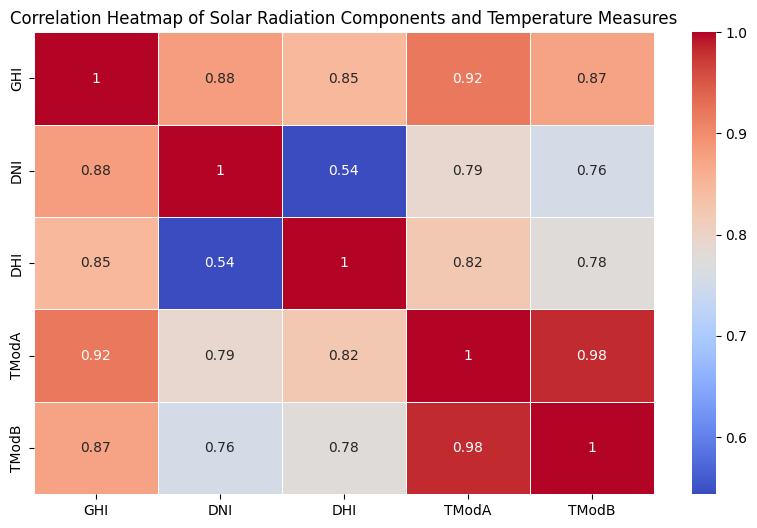

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Solar Radiation Components and Temperature Measures")
plt.show()


Pair Plot for Visualizing Relationships

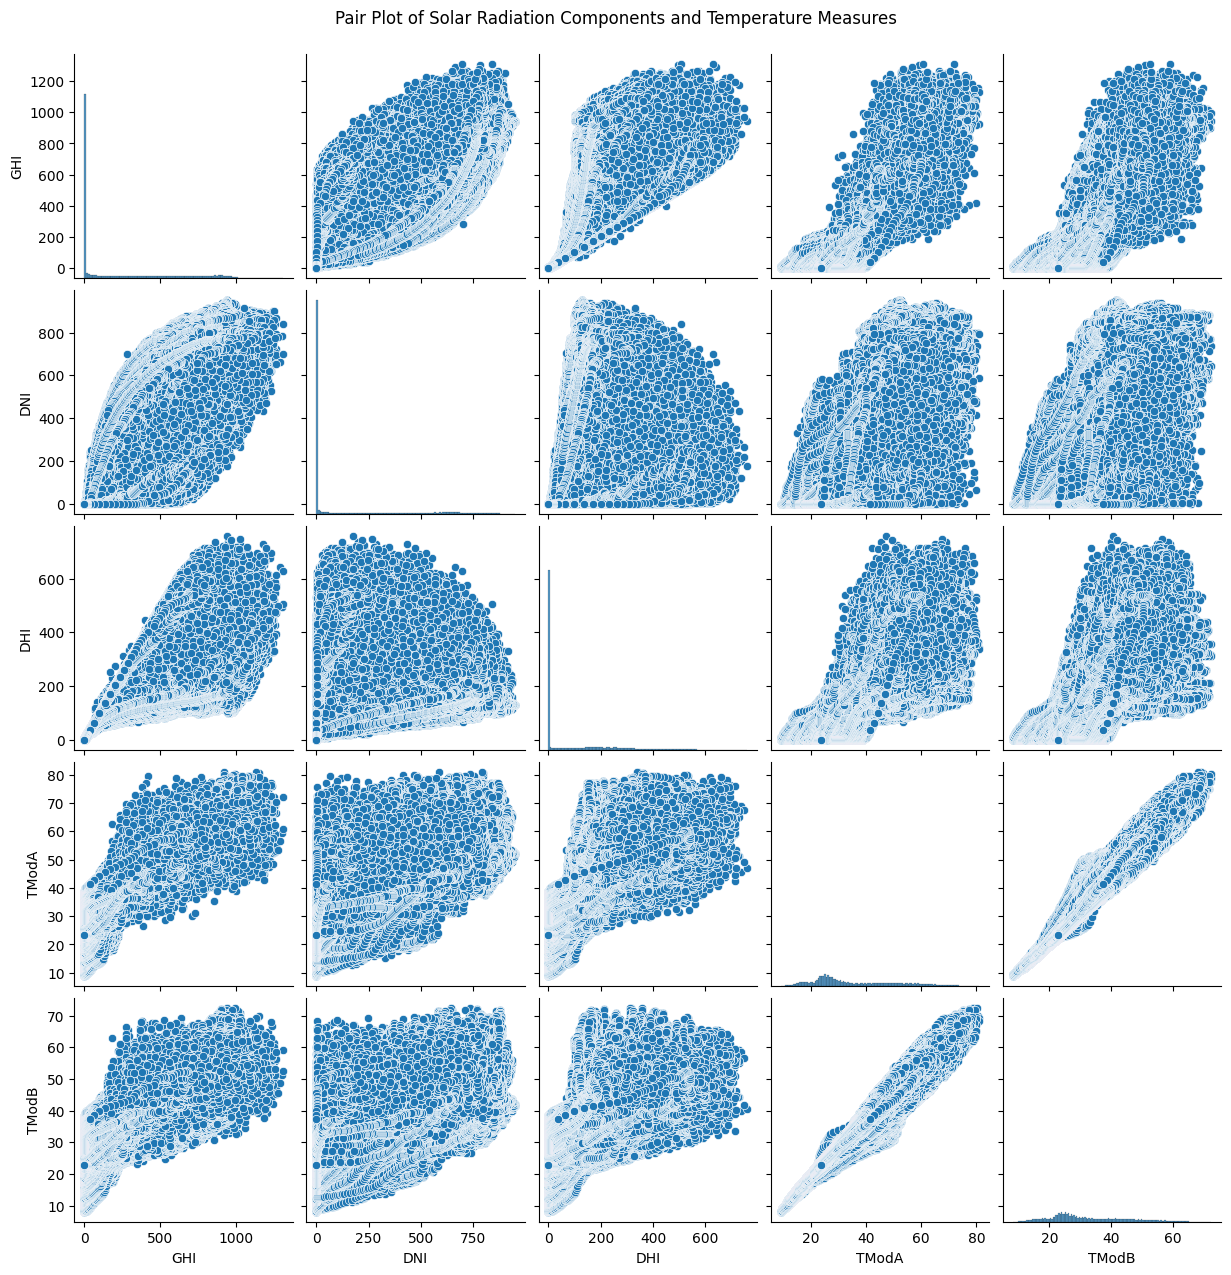

In [35]:
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.suptitle("Pair Plot of Solar Radiation Components and Temperature Measures", y=1.02)
plt.show()


Scatter Matrix for Wind Conditions vs. Solar Irradiance

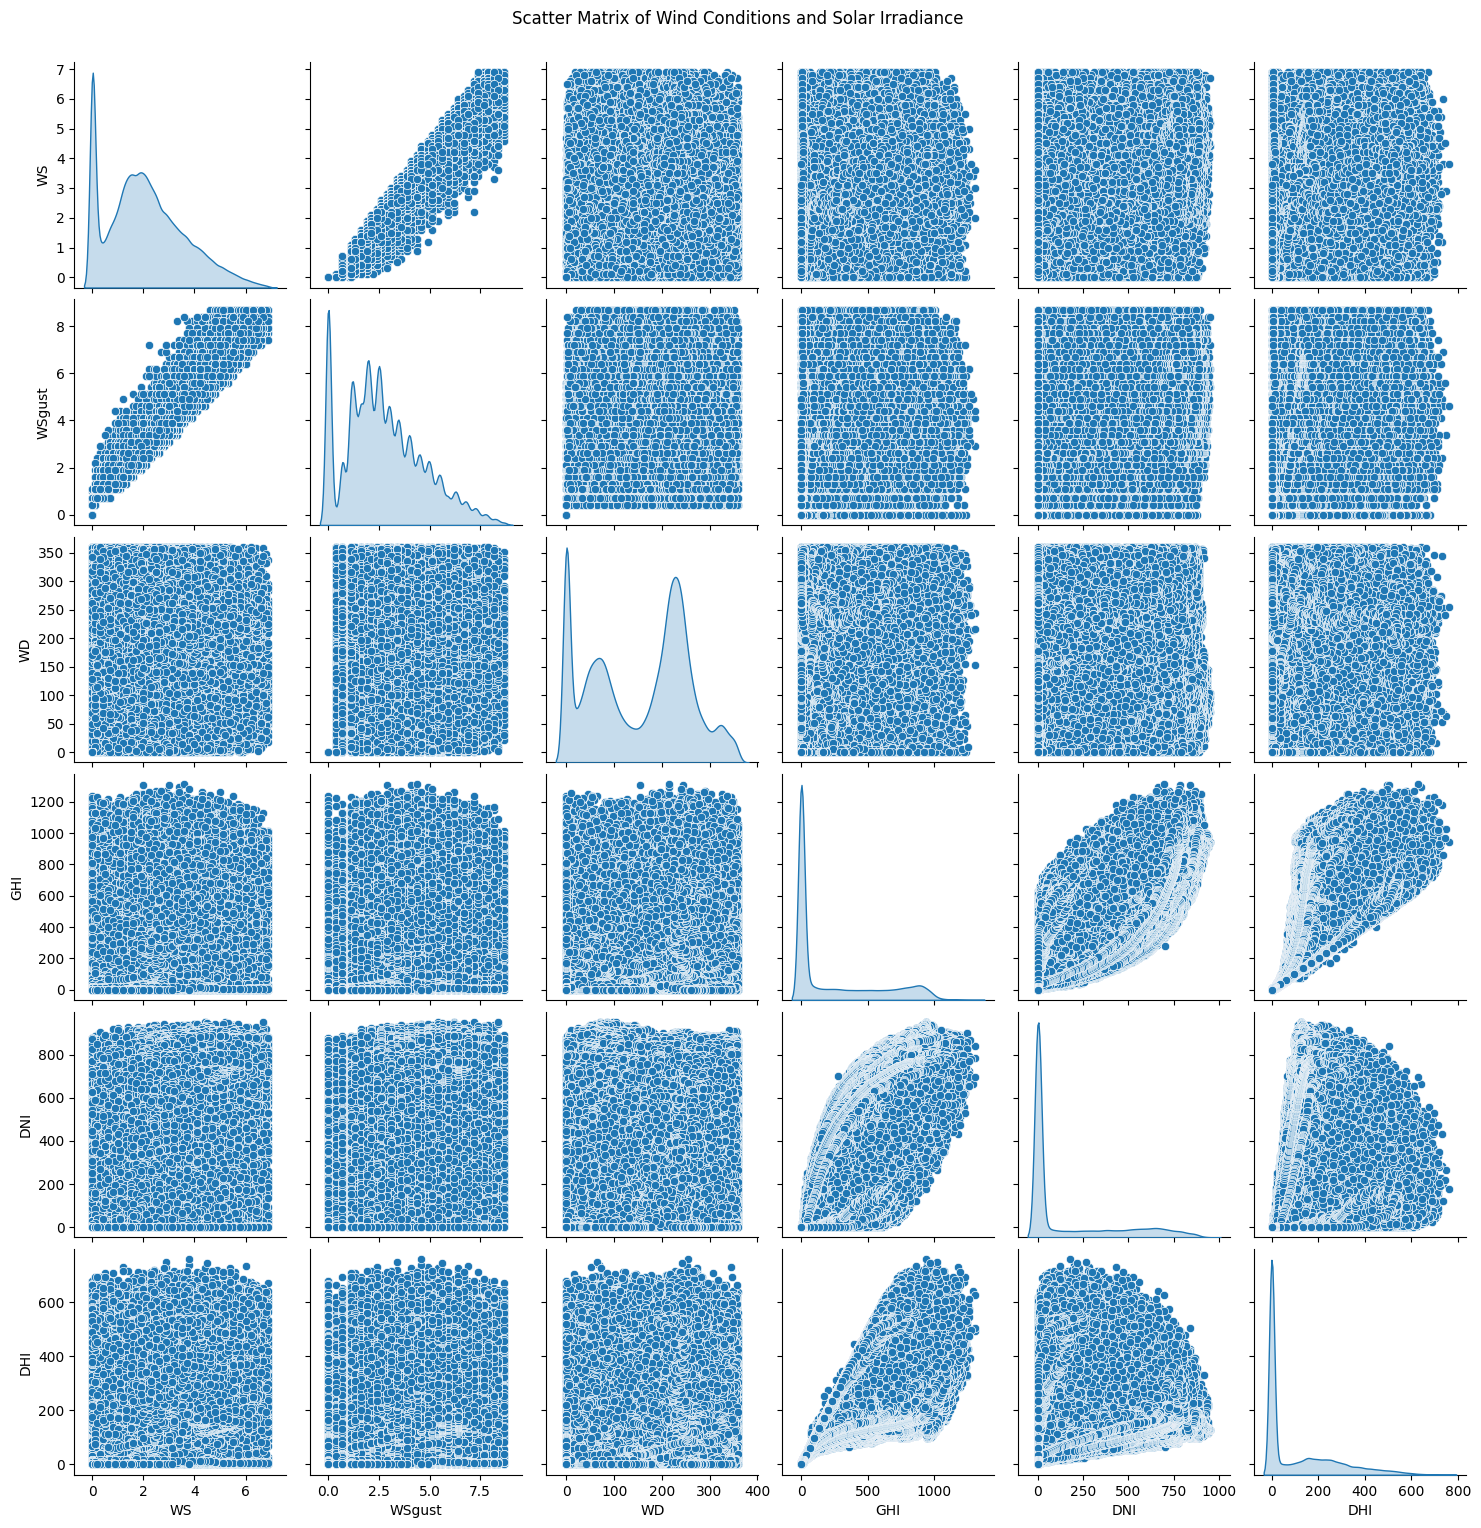

In [36]:
sns.pairplot(df[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']], diag_kind='kde')
plt.suptitle("Scatter Matrix of Wind Conditions and Solar Irradiance", y=1.02)
plt.show()


Creating polar plots for wind speed and direction

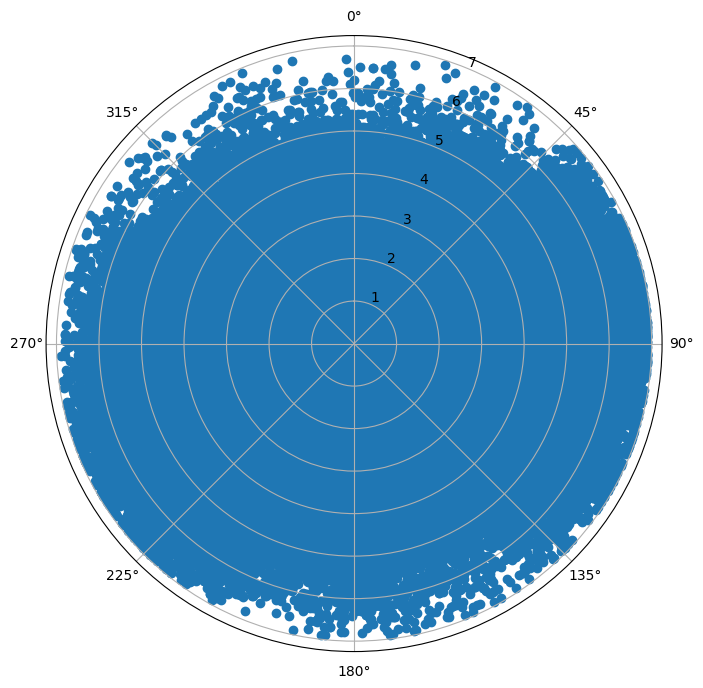

In [37]:

theta = np.deg2rad(df['WD'])
r = df['WS']

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.scatter(theta, r)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
plt.show()


Temperature and Humidity Analysis:

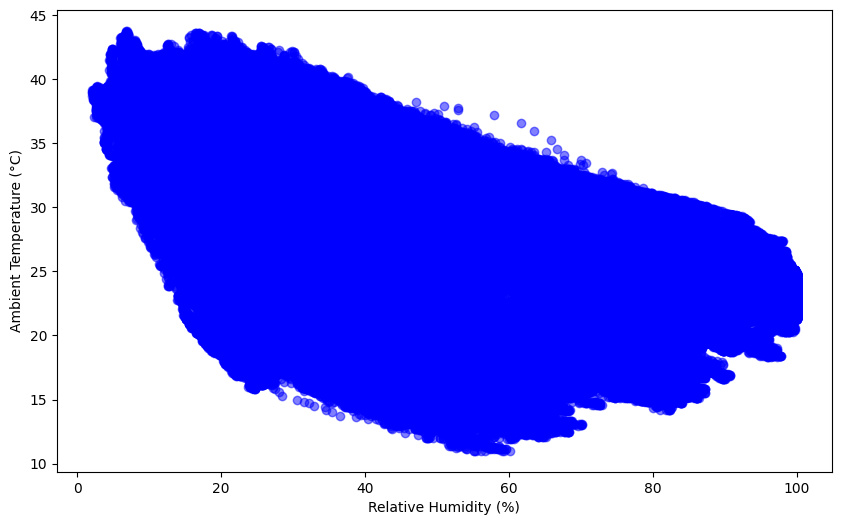

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RH'], df['Tamb'], c='blue', alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()
